In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
X,y=make_blobs(n_samples=200,centers=2,cluster_std=5)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=38)
scaler=StandardScaler().fit(X_train,y_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled.shape,X_test_scaled.shape)

(150, 2) (50, 2)


Text(0.5, 1.0, 'training set & scaled training set')

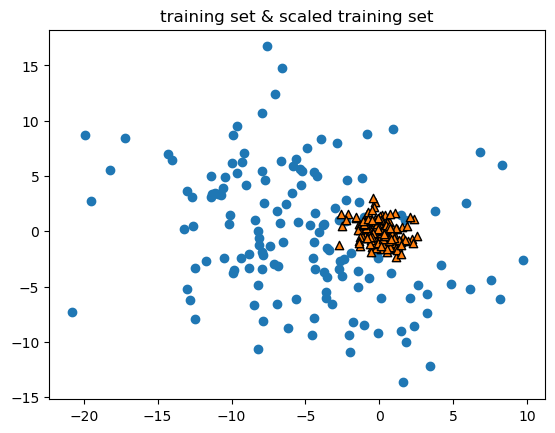

In [3]:
#原始
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],marker='^',edgecolor='k')
plt.title('training set & scaled training set')

In [5]:
#导入网格搜索
from sklearn.model_selection import GridSearchCV
params={'hidden_layer_sizes':[(50,),(100,),(100,100)],
       'alpha':[0.0001,0.001,0.01,0.1]}
grid=GridSearchCV(MLPClassifier(max_iter=1600,random_state=38),param_grid=params,cv=3)
grid.fit(X_train_scaled,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7266666666666667
{'alpha': 0.1, 'hidden_layer_sizes': (50,)}


In [6]:
    #打印模型在测试集中的得分
    print('\n\n\n')
    print('代码运行结果：')
    print('==============================\n')
    print('测试集得分：{}'.format(grid.score(X_test_scaled, y_test)))
    print('\n==============================')
    print('\n\n\n')





代码运行结果：

测试集得分：0.8





